In [1]:
import plaidml.keras

plaidml.keras.install_backend()

In [2]:
import os

os.environ["KERAS_BACKEND"] = "plaid.keras.backend"
import keras

keras.backend.backend()

'plaidml'

In [3]:
import scripts.vgg_19_relu_train as scrTrain

exp_name: str = "trained-exp-vgg19-relu.model"
train_dict = scrTrain.load_training_data("./CSV/train/processed_train.csv")

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_dict["label"] = le.fit_transform(train_dict["label"])

In [5]:
from sklearn.model_selection import train_test_split

(train_data, val_data, train_labels, val_labels) = train_test_split(
    train_dict["data"], train_dict["label"], test_size=0.30, random_state=80
)

In [6]:
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

input_shape: tuple = (48, 48, 1)

train_labels = to_categorical(train_labels, num_classes=4)
val_labels = to_categorical(val_labels, num_classes=4)
train_data = train_data.values.reshape(-1, 48, 48, 1)
val_data = val_data.values.reshape(-1, 48, 48, 1)

model = scrTrain.build_cnn(input_shape)

INFO:plaidml:Opening device "opencl_nvidia_quadro_k620.0"


In [7]:
history = model.fit(
    train_data, train_labels, epochs=10, validation_data=(val_data, val_labels)
)

Train on 12203 samples, validate on 5230 samples
Epoch 1/10
12203/12203 [==============================] - 477s 39ms/step - loss: 1.3258 - acc: 0.4138 - val_loss: 1.3183 - val_acc: 0.4124
Epoch 2/10
12203/12203 [==============================] - 436s 36ms/step - loss: 1.1786 - acc: 0.4848 - val_loss: 1.0115 - val_acc: 0.5750
Epoch 3/10
12203/12203 [==============================] - 436s 36ms/step - loss: 0.9006 - acc: 0.6389 - val_loss: 0.8751 - val_acc: 0.6434
Epoch 4/10
12203/12203 [==============================] - 435s 36ms/step - loss: 0.7112 - acc: 0.7261 - val_loss: 0.6917 - val_acc: 0.7302
Epoch 5/10
12203/12203 [==============================] - 436s 36ms/step - loss: 0.5792 - acc: 0.7812 - val_loss: 0.5772 - val_acc: 0.7742
Epoch 6/10
12203/12203 [==============================] - 436s 36ms/step - loss: 0.4797 - acc: 0.8237 - val_loss: 0.5596 - val_acc: 0.7836
Epoch 7/10
12203/12203 [==============================] - 435s 36ms/step - loss: 0.4239 - acc: 0.8442 - val_loss: 0.5

In [9]:
model.save("./output/" + exp_name)

OSError: Unable to create file (unable to open file: name = './output/trained-exp-vgg19-relu.model', errno = 13, error message = 'Permission denied', flags = 13, o_flags = 302)

In [17]:
print(history.history["accuracy"][0], "%")
print(history.history["val_accuracy"][0], "%")
print(train_labels.shape)
print(val_labels.shape)

{'val_loss': [1.3182668561005455, 1.0115472539661035, 0.8750784139788174, 0.6916670330851757, 0.577187555743449, 0.5596454484170983, 0.5002730764804789, 0.4975540307010337, 0.6352371907598886, 0.4948122850909516], 'val_acc': [0.4124282982791587, 0.5749521989211526, 0.6434034418193606, 0.7302103250933879, 0.7741873805427186, 0.7835564053993153, 0.8179732314715193, 0.8212237095513718, 0.8087954112722131, 0.8330783939726266], 'loss': [1.3258098901651594, 1.1786454518701193, 0.9005734419799247, 0.711239357634684, 0.5792082093572417, 0.4797130892591907, 0.423937900900831, 0.35801627040629813, 0.30022240060426697, 0.2651182074586085], 'acc': [0.4138326640892232, 0.4847988199525355, 0.6389412439759419, 0.7260509710971091, 0.7812013439806643, 0.823731869261333, 0.8442186347619438, 0.8688847004834876, 0.8901089895927231, 0.9073178726786875]}


KeyError: 'val_accuracy'

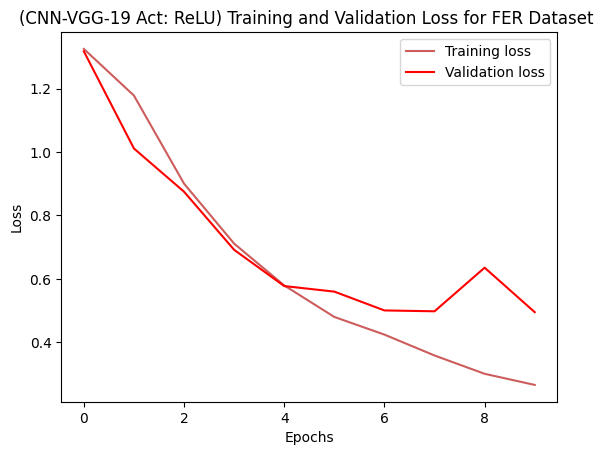

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Heart Failure Prediction: SVM and ANN
historyDF = pd.DataFrame(history.history)

plt.plot(historyDF.loc[:, ["loss"]], "#CD5C5C", label="Training loss")
plt.plot(historyDF.loc[:, ["val_loss"]], "#FF0000", label="Validation loss")
plt.title("(CNN-VGG-19 Act: ReLU) Training and Validation Loss for FER Dataset ")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="best")

plt.show()